In [46]:
import numpy as np
import matplotlib.pyplot as plt

In [47]:
# Parameters
LLODs = [100, 1000]  # Different LLODs to plot (genome copies/l or particles/l)
flow_rates = [10, 100, 1000] # Flow rates in liters per minute
efficiencies = [0.1, 0.5, 0.9] # Recovery efficiencies
C_air = np.linspace(0.1, 100) # Range of pathogen concentrations in the air (genome copies/l or particles/l)

# Air samplers data
air_samplers = {
    '6-stage Andersen impactor': {'flow_rate': 28.3, 'efficiency': 0.3},
    'AGI-30': {'flow_rate': 12.5, 'efficiency': 0.5},
    'BioSampler': {'flow_rate': 12.5, 'efficiency': 0.5},
    'VIVAS': {'flow_rate': 6.86, 'efficiency': 0.9}
}

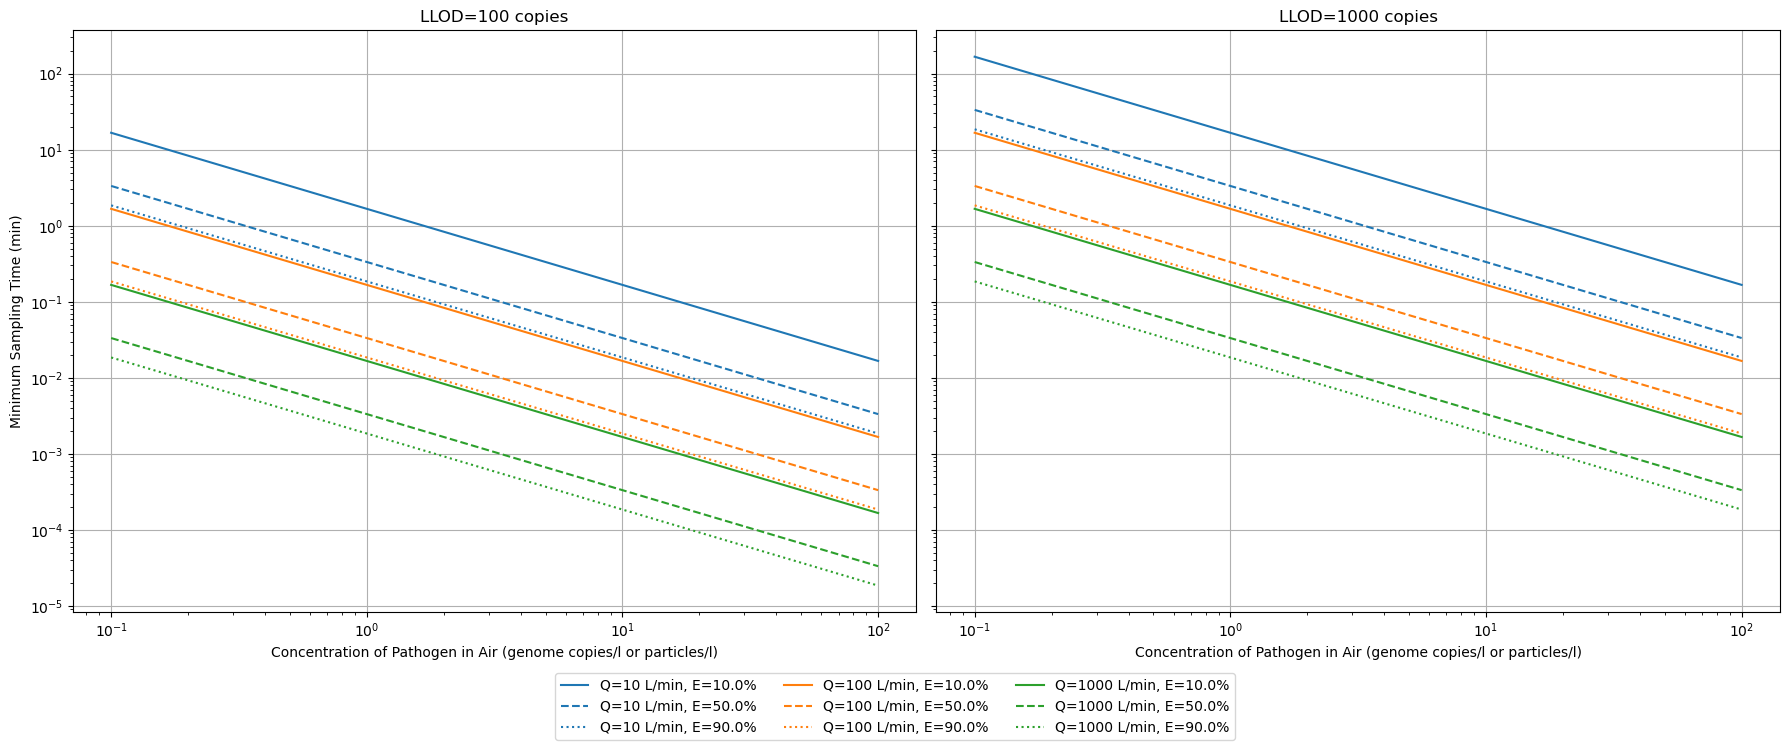

In [48]:
# Setup for subplots with a single, centralized legend with specific layout
fig, axs = plt.subplots(1, 2, figsize=(18, 8), sharex=True, sharey=True)
line_styles = ['-', '--', ':']

# Plotting without adding labels to avoid repetition in the legend
for ax, LLOD in zip(axs, LLODs):
    for i, Q in enumerate(flow_rates):
        for j, E in enumerate(efficiencies):
            # Convert flow rate from L/min to m³/s for calculations
            t_min = (LLOD / (C_air * Q * E)) / 60  # Calculate minimum sampling time in minutes
            t_hr = (LLOD / (C_air * Q * E)) / 60 / 60 # Calculate minimum sampling time in hours
            ax.plot(C_air, t_min, linestyle=line_styles[j], color=f'C{i}')
    
    ax.set_title(f'LLOD={LLOD} copies')
    ax.set_xscale('log')  # Use logarithmic scale for better visualization
    ax.set_yscale('log')  # Use logarithmic scale for better visualization
    ax.grid(True)
    ax.set_xlabel('Concentration of Pathogen in Air (genome copies/l or particles/l)')
    # if ax == axs[1]:  # Add X-axis label to the center plot
    #     ax.set_xlabel('Concentration of Pathogen in Air (genome copies/l or particles/l)')
    if ax == axs[0]:  # Add Y-axis label to the first subplot
        ax.set_ylabel('Minimum Sampling Time (min)')

# Create custom labels for the legend based on the flow rate and efficiency combinations
custom_labels = [f'Q={Q} L/min, E={E*100}%' for Q in flow_rates for E in efficiencies]

# Generate custom lines for the legend
custom_lines = [plt.Line2D([0], [0], color=f'C{i}', linestyle=line_styles[j]) 
                for i in range(len(flow_rates)) for j in range(len(efficiencies))]

# Adjust the layout to make room for the legend below the subplots
plt.tight_layout(rect=[0, 0.1, 1, 0.95])

# Place a single, centralized legend below the middle plot
fig.legend(custom_lines, custom_labels, loc='lower center', ncol=3, bbox_to_anchor=(0.5, 0.01))

plt.show()

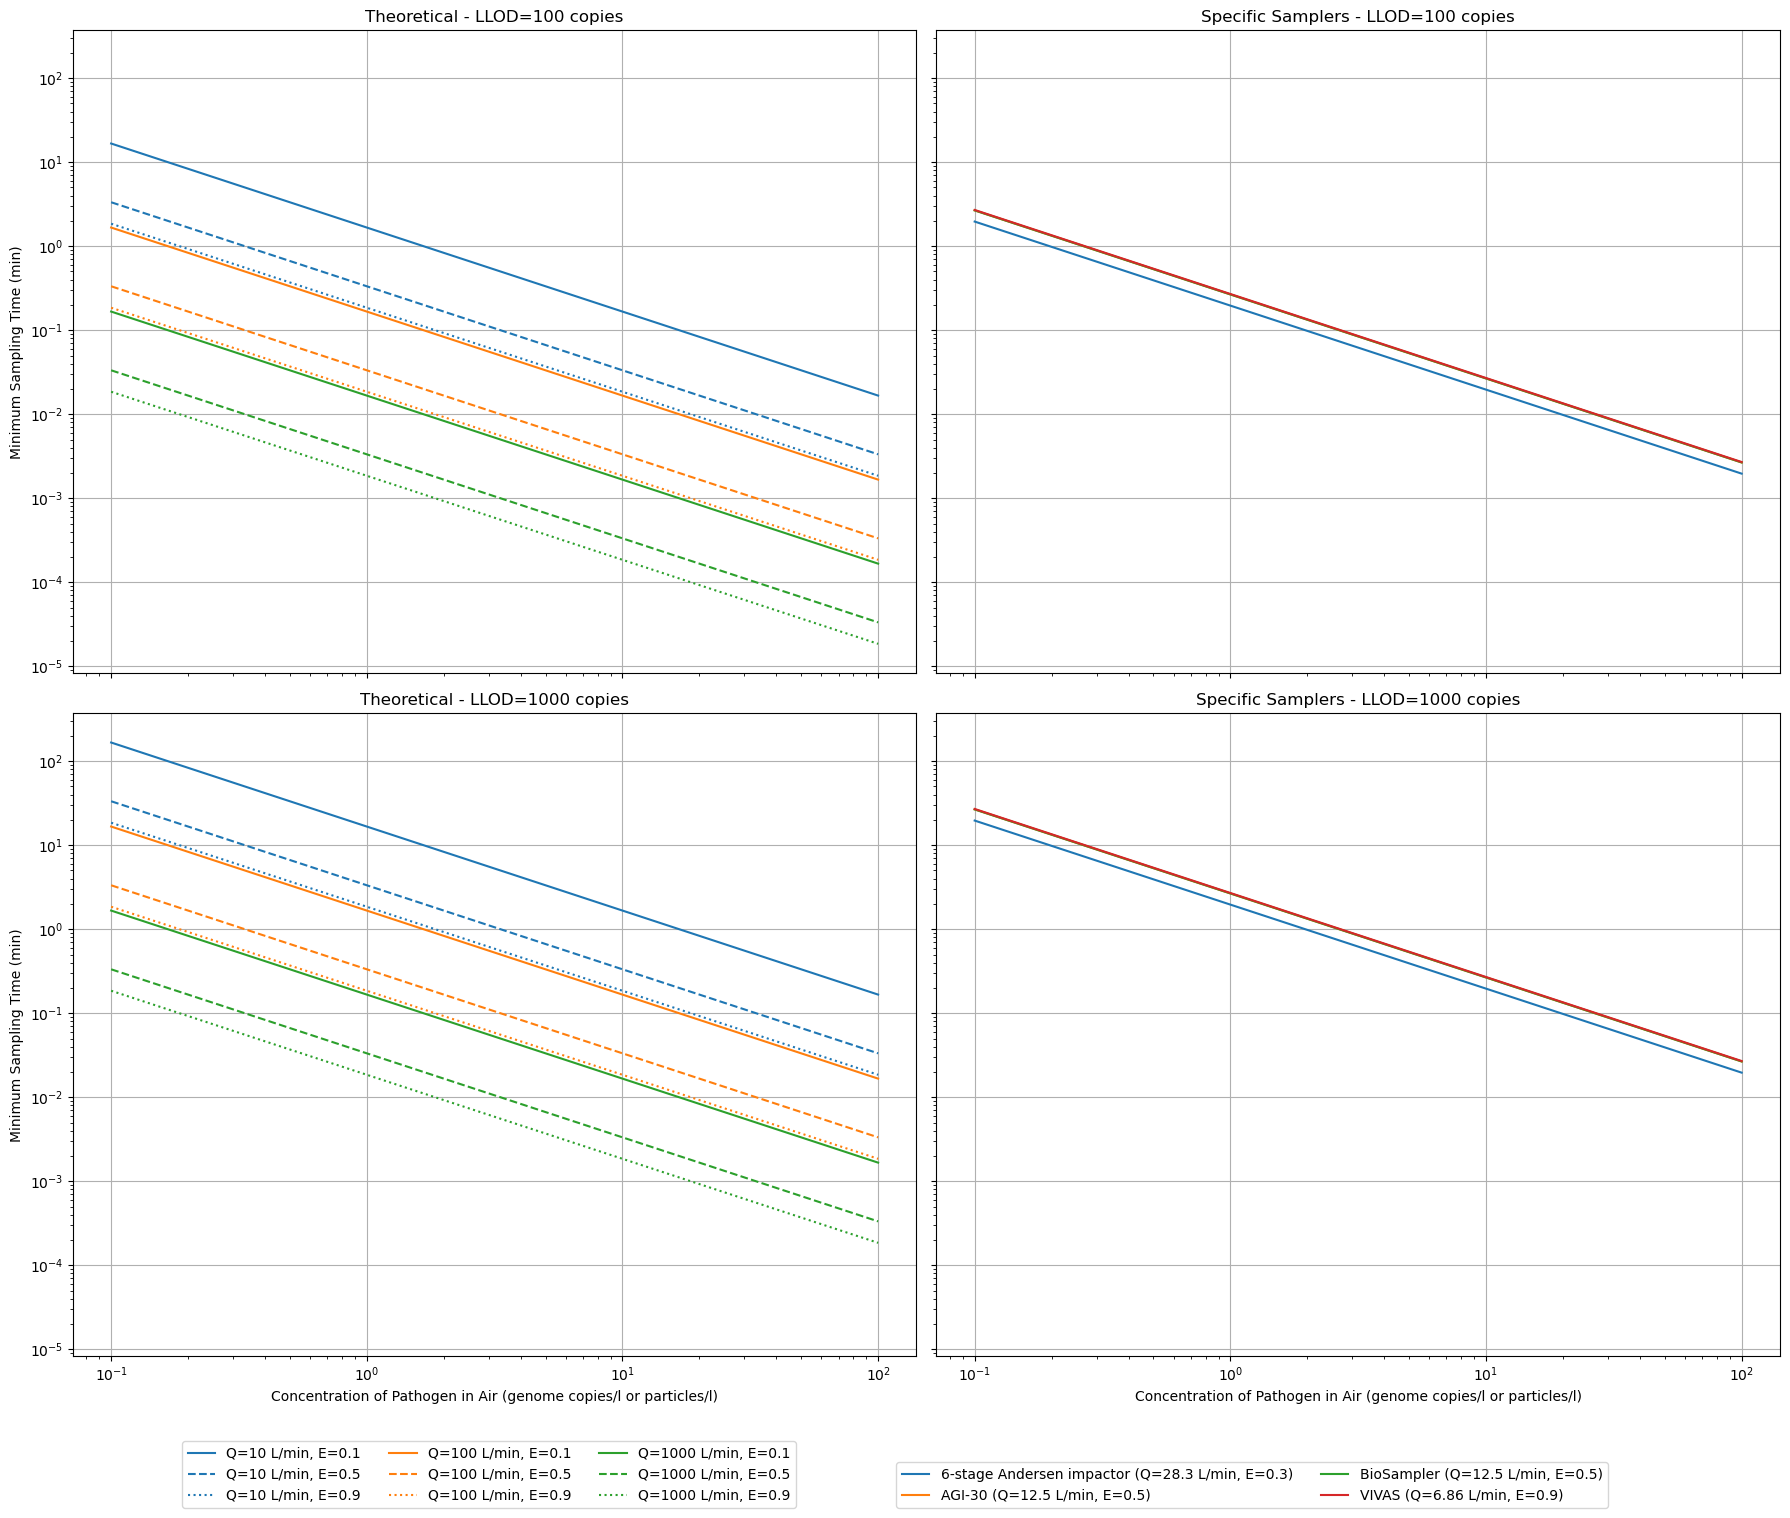

In [53]:
# Adjusting the setup for subplots and legends based on the new requirements
fig, axs = plt.subplots(2, 2, figsize=(18, 16), sharex='col', sharey='all')  # Sharing Y-axis across all plots
line_styles = ['-', '--', ':']

for i, LLOD in enumerate(LLODs):
    # Theoretical combinations plot
    for Q in flow_rates:
        for j, E in enumerate(efficiencies):
            t_min = (LLOD / (C_air * Q * E)) / 60  # Calculate minimum sampling time in minutes
            axs[i, 0].plot(C_air, t_min, linestyle=line_styles[j], color=f'C{flow_rates.index(Q)}', label=f'Q={Q} L/min, E={E}' if i == 0 else "")
    axs[i, 0].set_title(f'Theoretical - LLOD={LLOD} copies')
    axs[i, 0].set_xscale('log')
    axs[i, 0].set_yscale('log')
    axs[i, 0].grid(True)

    # Specific air samplers plot
    for sampler, properties in air_samplers.items():
        Q = properties['flow_rate']
        E = properties['efficiency']
        t_min = (LLOD / (C_air * Q * E)) / 60  # Calculate minimum sampling time in minutes
        axs[i, 1].plot(C_air, t_min, label=f'{sampler} (Q={Q} L/min, E={E})' if i == 0 else "")
    axs[i, 1].set_title(f'Specific Samplers - LLOD={LLOD} copies')
    axs[i, 1].set_xscale('log')
    axs[i, 1].set_yscale('log')
    axs[i, 1].grid(True)

# Set labels for the whole figure
axs[1, 0].set_xlabel('Concentration of Pathogen in Air (genome copies/l or particles/l)')
axs[1, 1].set_xlabel('Concentration of Pathogen in Air (genome copies/l or particles/l)')
axs[0, 0].set_ylabel('Minimum Sampling Time (min)')
axs[1, 0].set_ylabel('Minimum Sampling Time (min)')

# Adjust the layout to make room for the legends below the subplots, moving them further down
plt.tight_layout(rect=[0, 0.08, 1, 0.97])

# Adding legends for both theoretical parameters and specific samplers
handles_theoretical, labels_theoretical = axs[0, 0].get_legend_handles_labels()
fig.legend(handles_theoretical, labels_theoretical, loc='lower left', ncol=3, bbox_to_anchor=(0.1, 0.02))

handles_specific, labels_specific = axs[0, 1].get_legend_handles_labels()
fig.legend(handles_specific, labels_specific, loc='lower right', ncol=2, bbox_to_anchor=(0.9, 0.02))

plt.show()


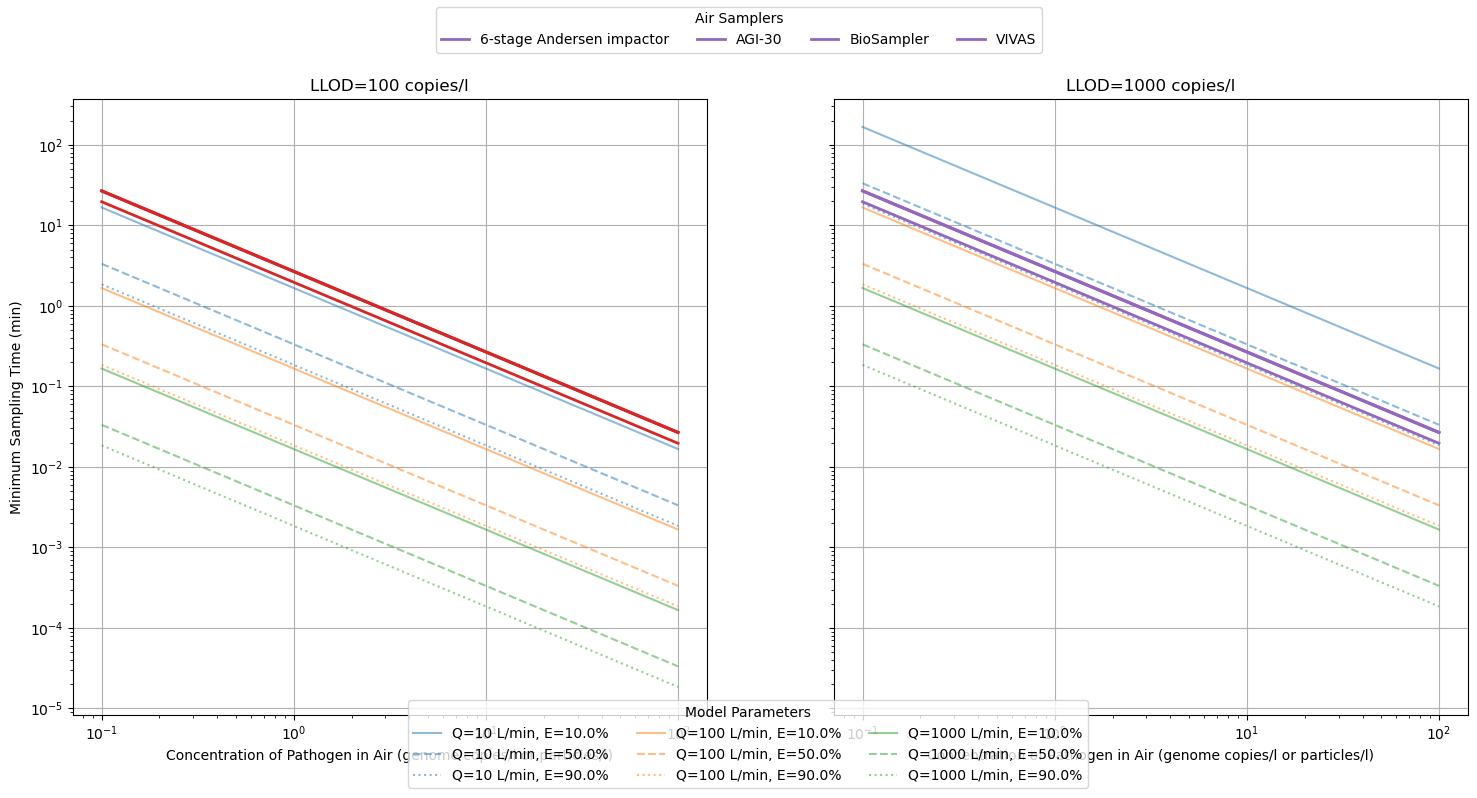

In [43]:
# Setup for subplots with a single, centralized legend with specific layout, reinitialized
fig, axs = plt.subplots(1, 2, figsize=(18, 8), sharex=True, sharey=True)

# Plotting the model's predictions
for ax, LLOD in zip(axs, LLODs):
    for i, Q in enumerate(flow_rates):
        for j, E in enumerate(efficiencies):
            # Calculate minimum sampling time in minutes
            t_min = (LLOD / (C_air * Q * E)) / 60
            ax.plot(C_air, t_min, linestyle=line_styles[j], color=f'C{i}', alpha=0.5)  # Reduced alpha for clarity

    # Set titles, scales, and labels
    ax.set_title(f'LLOD={LLOD} copies/l')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.grid(True)
    ax.set_xlabel('Concentration of Pathogen in Air (genome copies/l or particles/l)')
    if ax == axs[0]:
        ax.set_ylabel('Minimum Sampling Time (min)')

# Add air samplers as lines with unique identifiers
sampler_lines = []  # To hold line objects for legend
sampler_labels = []  # To hold label names for legend
for name, data in air_samplers.items():
    colors = [f'C{c}' for c in range(3, 3+len(name))]
    for ax, c in zip(axs, colors):
        # Calculate minimum sampling time for each sampler across the range of pathogen concentrations
        t_min_sampler = (LLODs[1] / (C_air * data['flow_rate'] * data['efficiency'])) / 60
        line, = ax.plot(C_air, t_min_sampler, linewidth=2, label=name, c=c)
    sampler_lines.append(line)
    sampler_labels.append(name)

# Create custom labels for the legend based on the flow rate and efficiency combinations
custom_labels = [f'Q={Q} L/min, E={E*100}%' for Q in flow_rates for E in efficiencies]

# Generate custom lines for the legend
custom_lines = [plt.Line2D([0], [0], color=f'C{i}', linestyle=line_styles[j], alpha=0.5) 
                for i in range(len(flow_rates)) for j in range(len(efficiencies))]

# Create a legend for the model parameters
param_legend = fig.legend(custom_lines, custom_labels, loc='lower center', ncol=3, title="Model Parameters", bbox_to_anchor=(0.5, 0.01))

# Create a separate legend for the air samplers
sampler_legend = fig.legend(sampler_lines, sampler_labels, loc='upper center', ncol=4, title="Air Samplers")

plt.show()

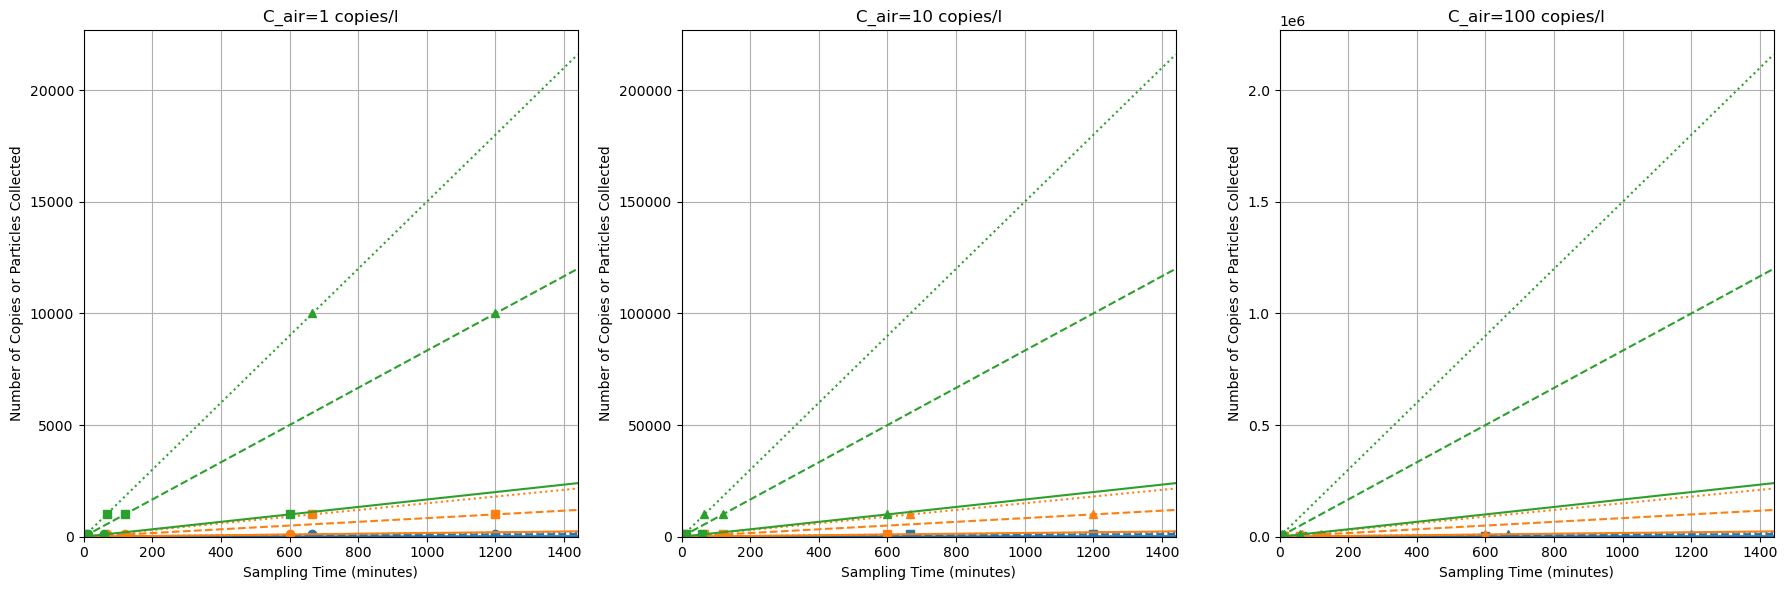

In [25]:
# Parameters for the new plot setup
pathogen_concentrations = [1, 10, 100]  # Different pathogen concentrations to plot (genome copies/l or particles/l)
sampling_times = np.linspace(0, 60*24, 100)  # Sampling times in minutes

# Setup for subplots with different pathogen concentrations
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Markers for LLODs
marker_styles = ['o', 's', '^']  # Different marker styles for each LLOD

for ax, C_air_fixed in zip(axs, pathogen_concentrations):
    for i, Q in enumerate(flow_rates):
        for j, E in enumerate(efficiencies):
            # Calculate the number of copies or particles collected over the sampling time
            N_collected = (sampling_times / 60) * Q * E * C_air_fixed  # Convert time to hours for Q in L/min
            ax.plot(sampling_times, N_collected, linestyle=line_styles[j], color=f'C{i}',
                    label=f'Q={Q} L/min, E={E*100}%')
            
            # Add markers for LLODs
            for k, LLOD in enumerate(LLODs):
                # Calculate the sampling time required to reach each LLOD
                t_LLOD = (LLOD / (C_air_fixed * Q * E)) * 60  # Convert back to minutes
                if t_LLOD < max(sampling_times):
                    ax.plot(t_LLOD, LLOD, marker_styles[k], color=f'C{i}',
                            label=f'LLOD={LLOD} copies/l' if i == 0 and j == 0 else "")
    
    ax.set_title(f'C_air={C_air_fixed} copies/l')
    ax.set_xlabel('Sampling Time (minutes)')
    ax.set_ylabel('Number of Copies or Particles Collected')
    ax.grid(True)
    ax.set_xlim(0, max(sampling_times))
    ax.set_ylim(bottom=0)

# Adjust layout for clarity
plt.tight_layout()

# Since each subplot already includes legends for LLODs, additional centralized legend is not added for simplicity
plt.show()